# Dataset from Kaggle

## скачивание

Нужно получить токен в своем кабинете Kaggle и загрузить в ноут и после запускать код скачивания

Подсказка как делать  - https://www.kaggle.com/general/74235

In [1]:
# Загрузка датасета с Кеггла
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d arka47/satellitegooglemapsmasks
 
!kaggle competitions download -c riiid-test-answer-prediction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 1.27G/1.29G [00:07<00:00, 219MB/s]
100% 1.29G/1.29G [00:07<00:00, 187MB/s]


## unzip

In [8]:
!unzip -q /content/riiid-test-answer-prediction.zip -d /content/data

#ЗАДАЧА

В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе.

Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

___
ВАМ НЕОБХОДИМО:
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.
___
ОПИСАНИЕ ДАННЫХ

Для выполнения задания вам необходимы файлы train.csv, lectures.csv, questions.csv.

TRAIN.CSV
- row_id: (int64) ID code for the row.
- timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.
- user_id: (int32) ID code for the user.
- content_id: (int16) ID code for the user interaction
- content_type_id: (int8)

>>  0 - if the event was a question being posed to the user, 

>>  1 - if the event was the user watching a lecture.


- task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.
- user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
- answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.
- prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.
- prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.
 

QUESTIONS.CSV: METADATA FOR THE QUESTIONS POSED TO USERS.

- question_id: foreign key for the train/test content_id column, when the content type is question (0).
- bundle_id: code for which questions are served together.
- correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
- part: the relevant section of the TOEIC test.
- tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.
 

LECTURES.CSV: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION.

- lecture_id: foreign key for the train/test content_id column, when the content type is lecture (1).
- part: top level category code for the lecture.
- tag: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.
- type_of: brief description of the core purpose of the lecture.
 

In [3]:
import pandas as pd
import gc

## Если преобразовать при загрузке, подглядев в ноутах на kaggle и частично урезав

In [10]:
train_df = pd.read_csv('/content/data/train.csv',
                        usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                        dtype={ 'row_id': 'int32',
                                'timestamp': 'int32',
                                'user_id': 'int32',
                                'content_id': 'int16',
                                'content_type_id': 'int8',
                                'task_container_id': 'int16',
                                'user_answer': 'int8',
                                'answered_correctly':'int8',
                                'prior_question_elapsed_time': 'float32',
                                'prior_question_had_explanation': 'boolean'
                                },  
                        nrows=9000000,
                        index_col=0                
                       )
display(train_df)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
8999995,1196461053,196122333,7886,0,237,3,0,20000.0,True
8999996,1196747295,196122333,7957,0,238,2,1,25000.0,True
8999997,1196786021,196122333,90,0,239,2,1,20000.0,True


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000000 entries, 0 to 8999999
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int32  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int8(3)
memory usage: 248.9 MB


Сколько пропусков?

In [12]:
train_df.isnull().sum()

timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       212075
prior_question_had_explanation     35585
dtype: int64

In [13]:
pd.isnull(train_df).sum().sum()

247660

In [14]:
train_df.content_type_id.value_counts()

0    8823510
1     176490
Name: content_type_id, dtype: int64

In [15]:
train_df.answered_correctly.value_counts()

 1    5801449
 0    3022061
-1     176490
Name: answered_correctly, dtype: int64

In [16]:
train_df.prior_question_had_explanation.value_counts()

True     7969452
False     994963
Name: prior_question_had_explanation, dtype: Int64

In [17]:
questions = pd.read_csv('/content/data/questions.csv',                         
                        usecols=[0, 1, 2, 3, 4],
                           dtype={'question_id': 'int16',
                                  'part': 'int8',
                                  'bundle_id': 'int8',
                                  'correct_answer': 'int8',
                                  'tags': 'object'}
                          )

In [18]:
display(questions)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,-50,3,5,14
13519,13519,-49,3,5,8
13520,13520,-48,2,5,73
13521,13521,-47,0,5,125


## Соеденим датафрейм train_df и questions по столбцам 'content_id' и 'question_id

In [19]:
train_df = pd.merge(train_df, questions, left_on = 'content_id', right_on = 'question_id', how = 'left')

In [20]:
display(train_df)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,115,5692,0,1,3,1,NaN,<NA>,5692.0,60.0,3.0,5.0,151
1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,84.0,2.0,5.0,168
2,118363,115,128,0,0,0,1,55000.0,False,128.0,-128.0,0.0,1.0,131 149 92
3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,-76.0,0.0,1.0,131 104 81
4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,-14.0,1.0,1.0,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,1196461053,196122333,7886,0,237,3,0,20000.0,True,7886.0,-50.0,0.0,1.0,9 10 92
8999996,1196747295,196122333,7957,0,238,2,1,25000.0,True,7957.0,21.0,2.0,1.0,131 36 38
8999997,1196786021,196122333,90,0,239,2,1,20000.0,True,90.0,90.0,2.0,1.0,131 93 162 38
8999998,1196826303,196122333,10414,0,240,2,1,19000.0,True,10414.0,-82.0,2.0,1.0,10 178 92


## Оставим ответы и уберем пропуски

In [21]:
train_df = train_df[train_df.content_type_id == False] 
train_df = train_df[train_df.answered_correctly != -1 ]
train_df.drop(['content_type_id','question_id'], axis = 1, inplace = True)
train_df.dropna(inplace = True)
display(train_df)

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
1,56943,115,5716,2,2,1,37000.0,False,84.0,2.0,5.0,168
2,118363,115,128,0,0,1,55000.0,False,-128.0,0.0,1.0,131 149 92
3,131167,115,7860,3,0,1,19000.0,False,-76.0,0.0,1.0,131 104 81
4,137965,115,7922,4,1,1,11000.0,False,-14.0,1.0,1.0,131 149 92
5,157063,115,156,5,2,1,5000.0,False,-100.0,2.0,1.0,131 101 162 38
...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,1196461053,196122333,7886,237,3,0,20000.0,True,-50.0,0.0,1.0,9 10 92
8999996,1196747295,196122333,7957,238,2,1,25000.0,True,21.0,2.0,1.0,131 36 38
8999997,1196786021,196122333,90,239,2,1,20000.0,True,90.0,2.0,1.0,131 93 162 38
8999998,1196826303,196122333,10414,240,2,1,19000.0,True,-82.0,2.0,1.0,10 178 92


In [22]:
train_df.answered_correctly.value_counts()

1    5777283
0    3010642
Name: answered_correctly, dtype: int64

## Сверим ответы  тестируемого `user_answer` с правильными ответами `correct_answer` и что занесено в `answered_correctly`

Построчное применение apply отсюда https://pythobyte.com/pandas-apply-a-helpful-illustrated-guide-2ff5fc95/

In [23]:
def check_system(df):
  if df.loc['user_answer'] == df.loc['correct_answer'] and df.loc['answered_correctly']:
    return False
  if df.loc['user_answer'] != df.loc['correct_answer'] and not df.loc['answered_correctly']:
    return False
  else: return True

train_df['Error'] = train_df.apply(check_system, axis=1)
display(train_df)

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,Error
1,56943,115,5716,2,2,1,37000.0,False,84.0,2.0,5.0,168,False
2,118363,115,128,0,0,1,55000.0,False,-128.0,0.0,1.0,131 149 92,False
3,131167,115,7860,3,0,1,19000.0,False,-76.0,0.0,1.0,131 104 81,False
4,137965,115,7922,4,1,1,11000.0,False,-14.0,1.0,1.0,131 149 92,False
5,157063,115,156,5,2,1,5000.0,False,-100.0,2.0,1.0,131 101 162 38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,1196461053,196122333,7886,237,3,0,20000.0,True,-50.0,0.0,1.0,9 10 92,False
8999996,1196747295,196122333,7957,238,2,1,25000.0,True,21.0,2.0,1.0,131 36 38,False
8999997,1196786021,196122333,90,239,2,1,20000.0,True,90.0,2.0,1.0,131 93 162 38,False
8999998,1196826303,196122333,10414,240,2,1,19000.0,True,-82.0,2.0,1.0,10 178 92,False


In [24]:
train_df['prior_question_had_explanation'].value_counts()

True     7969452
False     818473
Name: prior_question_had_explanation, dtype: Int64

Результат говорит, что ошибок (`True`) в учете системой - НЕТ!

In [25]:
train_df.drop(['Error','user_answer', 'correct_answer'], axis = 1, inplace = True)
display(train_df)

,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part,tags
1,56943,115,5716,2,1,37000.0,False,84.0,5.0,168
2,118363,115,128,0,1,55000.0,False,-128.0,1.0,131 149 92
3,131167,115,7860,3,1,19000.0,False,-76.0,1.0,131 104 81
4,137965,115,7922,4,1,11000.0,False,-14.0,1.0,131 149 92
5,157063,115,156,5,1,5000.0,False,-100.0,1.0,131 101 162 38
...,...,...,...,...,...,...,...,...,...,...
8999995,1196461053,196122333,7886,237,0,20000.0,True,-50.0,1.0,9 10 92
8999996,1196747295,196122333,7957,238,1,25000.0,True,21.0,1.0,131 36 38
8999997,1196786021,196122333,90,239,1,20000.0,True,90.0,1.0,131 93 162 38
8999998,1196826303,196122333,10414,240,1,19000.0,True,-82.0,1.0,10 178 92


## Как отвечали на вопросы - content_id

In [26]:
how_answer_questions = train_df[['content_id', 'answered_correctly']].groupby(['content_id']).agg(['mean'])
how_answer_questions.columns = ["answered_correctly_content_mean"]
how_answer_questions

,answered_correctly_content_mean
content_id,
0,0.901274
1,0.889571
2,0.558454
3,0.779570
4,0.627244
...,...
13518,0.782051
13519,0.569620
13520,0.702703


In [27]:
how_answer_questions['part'] = train_df.part
how_answer_questions.sort_values(by=['answered_correctly_content_mean'], ascending = False)

,answered_correctly_content_mean,part
content_id,,
12879,1.000000,4.0
12788,1.000000,5.0
12772,1.000000,5.0
2775,1.000000,6.0
2774,1.000000,6.0
...,...,...
10062,0.087848,5.0
3095,0.058824,6.0
8116,0.000000,5.0


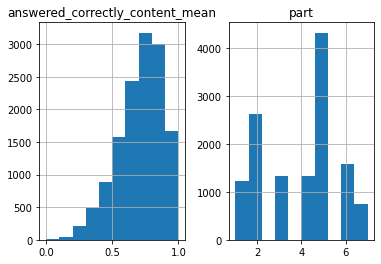

In [28]:
how_answer_questions.hist();

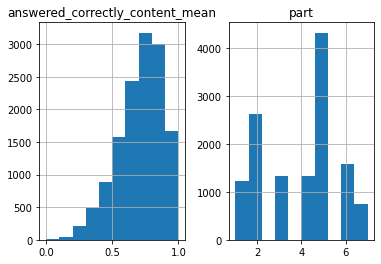

In [38]:
how_answer_questions.();

###Вопросы на которые не ответил никто

In [30]:
how_answer_questions[how_answer_questions.answered_correctly_content_mean == how_answer_questions.answered_correctly_content_mean.min()]

,answered_correctly_content_mean,part
content_id,,
8115,0.0,5.0
8116,0.0,5.0
13038,0.0,2.0


###Вопросы на которые ответили все

In [31]:
how_answer_questions[how_answer_questions.answered_correctly_content_mean == how_answer_questions.answered_correctly_content_mean.max()]

,answered_correctly_content_mean,part
content_id,,
238,1.0,2.0
243,1.0,5.0
440,1.0,6.0
563,1.0,4.0
616,1.0,7.0
...,...,...
13225,1.0,6.0
13234,1.0,5.0
13237,1.0,5.0


## Посмотрим по user_id

In [54]:
user_book = train_df[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count'])
user_book.columns = ["answered_correctly_user_mean", 'sum_correct', 'count']
user_book.sort_values(by=['count'], ascending = False)
user_book


,answered_correctly_user_mean,sum_correct,count
user_id,,,
115,0.688889,31.0,45
124,0.206897,6.0,29
2746,0.611111,11.0,18
5382,0.669355,83.0,124
8623,0.638889,69.0,108
...,...,...,...
196087402,0.384615,5.0,13
196112832,0.812500,13.0,16
196116047,0.625000,15.0,24


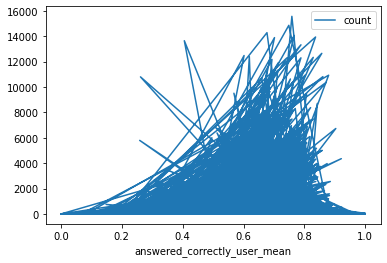

In [33]:
user_book.plot(y='count', x = 'answered_correctly_user_mean');

### Кто ответил на все вопросы

In [55]:
user_book[user_book['answered_correctly_user_mean'] == user_book['answered_correctly_user_mean'].max()].sort_values(by=['count'], ascending = False)

,answered_correctly_user_mean,sum_correct,count
user_id,,,
48102728,1.0,40.0,40
173568036,1.0,39.0,39
45312560,1.0,29.0,29
98596877,1.0,29.0,29
159191533,1.0,29.0,29
147681450,1.0,29.0,29
192986922,1.0,22.0,22
147686041,1.0,20.0,20
105412666,1.0,18.0,18


### Посмотрим квантили тестов 

In [56]:
print('quantile_0.25 доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.25 ))
print('quantile_0.5 доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.5 ))
print('quantile_0.75 доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.75 ))

quantile_0.25 доли хороших тестов = 0.42857142857142855
quantile_0.5 доли хороших тестов = 0.5666666666666667
quantile_0.75 доли хороших тестов = 0.6666666666666666


Посмотрим результвты тех кто прошел 50% квантиля тестов

In [57]:
user_book[user_book['count'] > user_book['count'].quantile( 0.5 ) ].sort_values(by=['count'], ascending = False)

,answered_correctly_user_mean,sum_correct,count
user_id,,,
73289878,0.758820,11808.0,15561
39919444,0.748755,11122.0,14854
66756934,0.676988,9664.0,14275
195124785,0.766406,10768.0,14050
111739511,0.836659,11658.0,13934
...,...,...,...
111318928,0.550000,22.0,40
53966705,0.575000,23.0,40
26869903,0.600000,24.0,40


## Соберем некоторые данные по полбзователю

In [63]:
user_book = train_df[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count'])
user_book.columns = ["answered_correctly_user_mean", 'sum_correct', 'count']
user_book.sort_values(by=['user_id'])


df_prior = train_df[['user_id', 'prior_question_had_explanation']].groupby(['user_id']).agg(['sum']).sort_values(by=['user_id'])
df_prior.columns = ['explanation_sum']

user_book = pd.merge(user_book, df_prior, left_index=True, right_index=True, how="left")
user_book = user_book.sort_values(by=['sum_correct'], ascending = False)
#user_book.drop(['movieId_x'], axis=1, inplace=True)
display(user_book)



,answered_correctly_user_mean,sum_correct,count,explanation_sum
user_id,,,,
73289878,0.758820,11808.0,15561,15381
111739511,0.836659,11658.0,13934,13175
39919444,0.748755,11122.0,14854,14661
119647028,0.857120,10840.0,12647,12569
195124785,0.766406,10768.0,14050,13766
...,...,...,...,...
137731159,0.000000,0.0,6,0
80215423,0.000000,0.0,16,9
32305524,0.000000,0.0,3,0


Видно, что есть связь суммы полученных успеваемости `sum_correct` и парамметра `prior_question_had_explanation` (его суммы), то есть просмотра объяснений после ответов

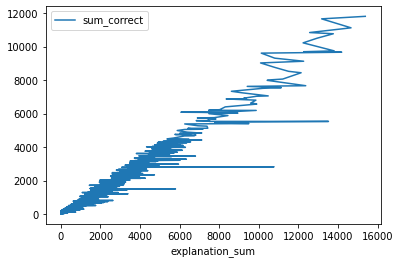

In [76]:
user_book.plot(y='sum_correct', x = 'explanation_sum' , kind = 'line');

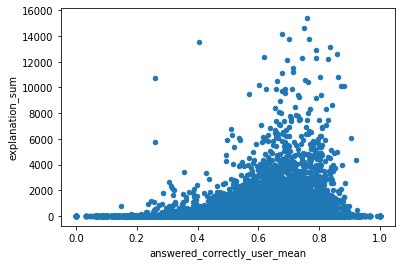

In [71]:
user_book.plot(x='answered_correctly_user_mean', y = 'explanation_sum' , kind = 'scatter');

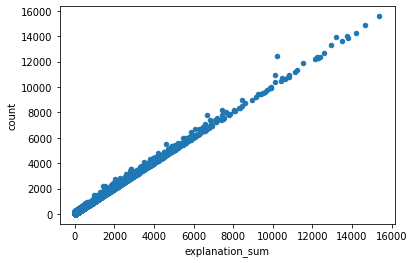

In [73]:
user_book.plot(y='count', x = 'explanation_sum' , kind = 'scatter');

Хочется после сдачи задания увидеть разбор подобных объмны задач!!!!!!!!!!!!!!!